1. Carry out descriptive analytics on the dataset.
2. Check whether female and male students scored the same marks.
3. Whether test preparation helps the students?

In [12]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

In [21]:
df= pd.read_csv('dataset w7.csv')

In [22]:
df.head()

,Gender,Test preparation,Total Marks
0,male,none,14
1,female,none,28
2,female,none,18
3,female,none,48
4,female,none,21


In [23]:
df.shape

(28, 3)

In [24]:
#Cross tabulating Gender and Test Preperation 
pd.crosstab(df['Gender'],df['Test preparation'], margins= True)

Test preparation,completed,none,All
Gender,,,
female,4,12,16
male,3,9,12
All,7,21,28


In [25]:
#Conducting the descriptive analytics of data
df.describe()

,Total Marks
count,28.000000
mean,32.321429
std,12.454520
min,12.000000
25%,22.500000
50%,33.000000
75%,43.250000
max,50.000000


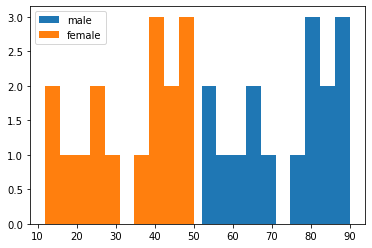

In [39]:
#checking for normal distribution of two groups 
df1=df

df1_m=df1.loc[df['Gender']=='male']['Total Marks'].reset_index(drop=True)
df1_f=df1.loc[df['Gender']=='female']['Total Marks'].reset_index(drop=True)
df1_m = df1_f + 40
plt.hist(df1_m, label = 'male')
plt.hist(df1_f,label = 'female')

plt.legend()
plt.show()


In [51]:
#Check whether female and male students scored the same marks.

#Two sampled T-test :-The Independent Samples t Test or 2-sample t-test compares the means of two independent groups
#in order to determine whether there is statistical evidence that the associated population means 
#are significantly different.

#Assumptions:
#Observations in each sample are independent and identically distributed (iid).
#Observations in each sample are normally distributed.
#Observations in each sample have the same variance.

# H0 Null hypothesis is that female and male students scored the same mean marks μ1 = μ2
# Ha Alternate Hypothesis is that female and male students didnot score the same mean marks. μ1≠μ2
#alpha = 0.05

df_m=df.loc[df['Gender']=='male']['Total Marks']
df_f=df.loc[df['Gender']=='female']['Total Marks']

#using function ttest_ind() 
stat, p = st.ttest_ind(df_m,df_f)

print('Statistical Value = %.3f , p_value = %.6f' % (stat,p))
if p<0.05:
    print('Reject the null hypothesis. The female and male students have different distribution of marks')
else:
    print('Failed to reject the null hypothesis. The female and male students have the same distribution of marks')



Statistical Value = -0.694 , p_value = 0.493782
Failed to reject the null hypothesis. The female and male students have the same distribution of marks


In [52]:
#Whether test preparation helps the students?
# H0 Null hypothesis is that test preparation doesnt help students or μ1 = μ2
# Ha Alternate Hypothesis is that test preparaion help students. or μ1 ≠ μ2 

#alpha = 0.05

df2_m=df.loc[df['Test preparation']=='completed']['Total Marks']
df2_f=df.loc[df['Test preparation']=='none']['Total Marks']

#using function ttest_ind() 
stat, p = st.ttest_ind(df2_m,df2_f)

print('Statistical Value = %.3f , p_value = %.15f' % (stat,p))
if p<0.05:
    print('Reject the null hypothesis. Test preparation helps students.')
else:
    print('Failed to reject the null hypothesis. Test preparation doesnt help students.')




Statistical Value = 3.614 , p_value = 0.001267129245732
Reject the null hypothesis. Test preparation helps students.
